# Import Packages

In [46]:
# sys
import os
from os.path import isfile
from inspect import CO_VARARGS
import warnings

warnings.filterwarnings("ignore")  # ignoring warnings

# SKLearn
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn import metrics

#NLTK & NLP
import nltk
from urllib import request
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
from string import punctuation
from nltk.stem import PorterStemmer


# Other Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pandas_profiling import ProfileReport
from os import listdir, walk
from os.path import isfile, join
import re
import string
from itertools import groupby
import seaborn as sns
import email #library for managing email messages

In [47]:
# to count letters and punctuation in a string
count = lambda l1, l2: sum([1 for x in l1 if x in l2])


def replace_multiple(mainString, toBeReplaces, newString):
    """
    Replace a set of multiple sub strings with a new string in main string.
    """
    # Iterate over the strings to be replaced
    for elem in toBeReplaces:
        # Check if string is in the main string
        if elem in mainString:
            # Replace the string
            mainString = mainString.replace(elem, newString)

    return mainString


def grid_search(X, y, model, grid, score, cv):
    # define search
    search_grid_search_measure = GridSearchCV(
        model, grid, scoring=score, cv=cv, n_jobs=nj, verbose=1
    )

    labels_true = y.to_numpy()
    labels_true = np.squeeze(np.asarray(np.transpose(labels_true)))

    # perform the search
    results_grid_search_measure = search_grid_search_measure.fit(X, labels_true)

    return results_grid_search_measure

# Data Engineering

In [48]:
from os import listdir, getcwd, chdir
from os.path import isfile, join, dirname, realpath
import pandas as pd

import email
import email.parser
from email.parser import Parser

def get_cwd():
    try:
        chdir(dirname(realpath(__file__)))
    except:
        chdir('/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/MSDS-7333-QTW/')

    active_dir = getcwd()
       
    return active_dir

def main():
    
    get_cwd()
    
    directories = [
            'easy_ham',
            'easy_ham_2',
            'hard_ham',
            'spam',
            'spam_2'
        ]
    
    res_frame = pd.DataFrame()

    # *dc - Added to keep a collection of email text
    emails = []

    emails_body = []
        
    for d in directories:
        mypath = getcwd() + '/data/' + d + '/'
        onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    
        try:
            onlyfiles.remove('.DS_Store')
        except:
            pass
        
        for file in onlyfiles:
            with open(mypath + file, encoding='latin1') as f:
                lines = f.readlines()
                f.seek(0) # reset file pointer to beginning
                body = f.read()
                f.close()
            
            # with open(mypath + file, encoding='latin1') as f:
            #     body = f.read()
            #     f.close()
                
            msg = email.message_from_string(str(body))
            tmpStr = ''
            
            if msg.is_multipart():
                for payload in msg.get_payload():
                    #tmp.append(str(payload.get_payload()))
                    
                    tmpStr = ' '.join(str(payload.get_payload()))
                emails_body.append(tmpStr)
            else:
                emails_body.append(str(msg.get_payload()))
                
            in_reply_count = 0
            sub_line_all_caps = 0
            attachments = 0
            subject_line = []
            n_lines = 0
            blank_lines = []
            
            for line in lines:

                n_lines += 1
                if "Subject: Re: " in line:
                   in_reply_count += 1
                if "Subject: " in line:
                   s_line = line.strip().replace('Subject: ','')
                   s_line = ''.join(e for e in s_line if e.isalnum())
                   num_upper = sum(1 for c in s_line if c.isupper())
                   ttl_chars = len(s_line)
                   if num_upper == ttl_chars:
                       sub_line_all_caps += 1
                   subject_line.append(s_line)
                if "content-type: multipart" in line.lower():
                   attachments += 1
                if line == "\n":
                   blank_lines.append(n_lines)
        
            temp_frame = pd.DataFrame({
                        'directory':d,    
                        'filename':file,
                        'is_spam':['Y' if 'spam' in d else 'N'],
                        'in_reply': ['Y' if in_reply_count > 0 else 'N'], 
                        'subj_caps': ['Y' if sub_line_all_caps > 0 else 'N'], 
                        'attachments': ['Y' if attachments > 0 else 'N'],
                        ## *dc+3 
                        #'body_lines': n_lines - min(blank_lines)
                        'body_lines': [0 if len(blank_lines) == 0 else min(blank_lines)]
                        }, index=[0])
           
            res_frame = res_frame.append(temp_frame, ignore_index=True)

            ## *dc+2
            # append body of email to collection
            text = ' '.join(lines)
            emails.append(text)
            
    #res_frame.to_csv('output_file.csv', index=False)
    
    ## *dc - add emails
    return res_frame, emails, emails_body

## *dc - Working from a notebook instead of py file.
df, emails, emails_body = main()


In [49]:
df

,directory,filename,is_spam,in_reply,subj_caps,attachments,body_lines
0,easy_ham,2170.78c282a5e417d6d231dc75aa8588ebb7,N,N,N,N,24
1,easy_ham,0461.7609029b07acf65f40bd93882aa35887,N,N,N,N,51
2,easy_ham,00769.25bf9a767b5db0ed93f03c1637281663,N,Y,N,N,43
3,easy_ham,01074.8590d61ac0aeeadb58dc2f2ba776c406,N,N,N,N,51
4,easy_ham,02479.14365bcad3a60fcf24c5c1813f6291fb,N,Y,N,N,48
...,...,...,...,...,...,...,...
9348,spam_2,01311.43bfe86df65d53c5f7ca2365dc12582b,Y,N,N,N,25
9349,spam_2,00851.dc5452f80ba0bb8481dfc48f70380c4d,Y,N,N,N,47
9350,spam_2,01328.b23902de23cb3ca1f3334517282372b2,Y,N,N,N,54
9351,spam_2,01244.9ef966101737a6fc27d8965def288d70,Y,N,N,N,38


In [50]:
# Changing Y,N to 1 and 0
df = df.replace(['Y','N'],[1,0])
df

,directory,filename,is_spam,in_reply,subj_caps,attachments,body_lines
0,easy_ham,2170.78c282a5e417d6d231dc75aa8588ebb7,0,0,0,0,24
1,easy_ham,0461.7609029b07acf65f40bd93882aa35887,0,0,0,0,51
2,easy_ham,00769.25bf9a767b5db0ed93f03c1637281663,0,1,0,0,43
3,easy_ham,01074.8590d61ac0aeeadb58dc2f2ba776c406,0,0,0,0,51
4,easy_ham,02479.14365bcad3a60fcf24c5c1813f6291fb,0,1,0,0,48
...,...,...,...,...,...,...,...
9348,spam_2,01311.43bfe86df65d53c5f7ca2365dc12582b,1,0,0,0,25
9349,spam_2,00851.dc5452f80ba0bb8481dfc48f70380c4d,1,0,0,0,47
9350,spam_2,01328.b23902de23cb3ca1f3334517282372b2,1,0,0,0,54
9351,spam_2,01244.9ef966101737a6fc27d8965def288d70,1,0,0,0,38


## Data Pre-processing for emails

In [51]:
import nltk
import re 
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lowercase and remove special characters to form a normalized document
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()

    # tokenize document
    tokens = nltk.word_tokenize(doc)
    
    # filter out stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Remove numbers
    filtered_tokens = [token for token in filtered_tokens if not token.isdigit()]

    # Remove short tokens
    filtered_tokens = [token for token in filtered_tokens if len(token) > 2]

    # stem tokens - Skipping for now
    #filtered_tokens = [stemming.stem(token) for token in filtered_tokens]

    # re-create a normalized document
    doc = ' '.join(filtered_tokens)
    return doc

normalize_text = np.vectorize(normalize_document)
norm_text = normalize_text(emails)

print(type(norm_text),len(norm_text))

<class 'numpy.ndarray'> 9353


In [52]:
norm_text = pd.DataFrame(norm_text)
directory = pd.DataFrame(df['directory'])
combined_df = pd.concat([norm_text,directory],axis=1)
combined_df.columns = ['text','directory']
combined_df['text'] = combined_df['text'].apply(lambda x: x.split())
combined_df

,text,directory
0,"[rssfeeds, jmason, org, mon, sep, return, path...",easy_ham
1,"[fork, admin, xent, com, tue, sep, return, pat...",easy_ham
2,"[fork, admin, xent, com, tue, sep, return, pat...",easy_ham
3,"[rpm, list, admin, freshrpms, net, mon, sep, r...",easy_ham
4,"[secprog, return, jmason, org, securityfocus, ...",easy_ham
...,...,...
9348,"[687ifsuy, bol, com, tue, aug, return, path, 6...",spam_2
9349,"[mraimecoilcipc, msn, com, mon, jul, return, p...",spam_2
9350,"[fork, admin, xent, com, thu, aug, return, pat...",spam_2
9351,"[niddeel, hotmail, com, tue, aug, return, path...",spam_2


# EDA
### `Latent Dirichlet Allocation (LDA) Topic Modeling`
- Topic modeling using LDA will be utilized for the EDA to extract main topics of the given email content and see how certain lemmatized texts correlate with each email directory. 
- LDA is a type of statistical modeling used to classify text in a document to a particular topic. Dirichlet distribution is used here to calculate a topic per document model and words per topic model. 
- Due to the newest version of Gensim package removing one of key LDA wrappers, Mallet's LDA result cannot be transferred to a Gensim model for PCA visualization. Gensim will be separately modeled and the results will be compared against Mallet's version to verify both results and enhance the insights.

### Training Mallet's topic model

In [54]:
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import little_mallet_wrapper as lmw

combined_df['text_2'] = combined_df['text'].apply(lambda x: ' '.join(x))

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

path_to_mallet = "/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/CaseStudy_Bo/CS3/mallet-2.0.8/bin/mallet" # update this path
training_data = [lmw.process_string(t) for t in combined_df['text_2']]
training_data = [d for d in training_data if d.strip()]


# Number of topics that user specifies
num_topics = 15  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/boyun/Desktop/SMU/DS7333-QuantifyingTheWorld/CaseStudy_Bo/CS3' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

Importing data...
Complete
Training topic model...
Complete


### Topic keys and words

In [ ]:
assert(len(topic_distributions) == len(training_data))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 NUM net sourceforge list freshrpms rpm received localhost spamassassin lists
1 	 org localhost com received oct slashnull dogma jmason sep http
2 	 com net received localhost NUM jul org netnoteinc esmtp content
3 	 said NUM one people world would states government new united
4 	 http www com net href radio html asp weblogs org
5 	 NUMd font NUM size face color NUMdNUM nbsp width align
6 	 com xent fork NUM localhost list org received mailto sep
7 	 NUM bNUM dNUM aNUM cNUM eNUM iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii pjNUM fNUM idNUM
8 	 linux ilug NUM org localhost received lugh NUMe aug tuatha
9 	 NUM com http one spam code net date message org
10 	 NUM com exmh org redhat users taint spamassassin workers listman
11 	 NUM blockquote business money free com people email get one
12 	 http www href font nbsp NUM lockergnome com table html
13 	 NUM width http src img height gif font www border
14 	 NUM type securityfocus iiq content insuranceiq se

In [ ]:
# Organizing the result into a dictionary

topic_word_probability_dict = lmw.load_topic_word_distributions(output_directory_path + '/mallet.word_weights.' + str(num_topics))
len(topic_word_probability_dict)

15

#### Each topic and its weight distribution of words 

In [55]:
for _topic, _word_probability_dict in topic_word_probability_dict.items():
    print('Topic', _topic)
    for _word, _probability in sorted(_word_probability_dict.items(), key=lambda x: x[1], reverse=True)[:15]:
        print(round(_probability, 4), '\t', _word)
    print()

Topic 0
0.0667 	 NUM
0.0607 	 net
0.0318 	 sourceforge
0.0301 	 list
0.0226 	 freshrpms
0.0215 	 rpm
0.0158 	 received
0.0156 	 localhost
0.0153 	 spamassassin
0.0145 	 lists
0.0143 	 example
0.0129 	 zzzlist
0.0112 	 esmtp
0.0111 	 talk
0.011 	 razor

Topic 1
0.0568 	 org
0.0421 	 localhost
0.0412 	 com
0.028 	 received
0.0203 	 oct
0.0183 	 slashnull
0.0183 	 dogma
0.0179 	 jmason
0.0153 	 sep
0.0152 	 http
0.0144 	 taint
0.0143 	 rssfeeds
0.0139 	 spamassassin
0.0137 	 esmtp
0.0135 	 jalapeno

Topic 2
0.0599 	 com
0.0274 	 net
0.0249 	 received
0.0201 	 localhost
0.013 	 NUM
0.0126 	 jul
0.0126 	 org
0.0116 	 netnoteinc
0.0114 	 esmtp
0.0107 	 content
0.0098 	 http
0.0096 	 zzzz
0.0096 	 aug
0.009 	 mail
0.0079 	 mon

Topic 3
0.0045 	 said
0.0044 	 NUM
0.0044 	 one
0.0043 	 people
0.0042 	 world
0.0037 	 would
0.0035 	 states
0.0033 	 government
0.0032 	 new
0.0032 	 united
0.0031 	 also
0.0024 	 time
0.0023 	 years
0.0023 	 security
0.0022 	 first

Topic 4
0.1209 	 http
0.0687 	 ww

### Results from the heatmap and box and whisker plots below suggest that __Topic 2 and 14 are highly correlated with 'Spam'__ directory and __Topic 2, 5 and 11 are highly correlated with 'Spam_2'__ directory. This shows the correlation of certain words with directories and address the need to include clustering of lemmatized texts as a feature in the prediction model.

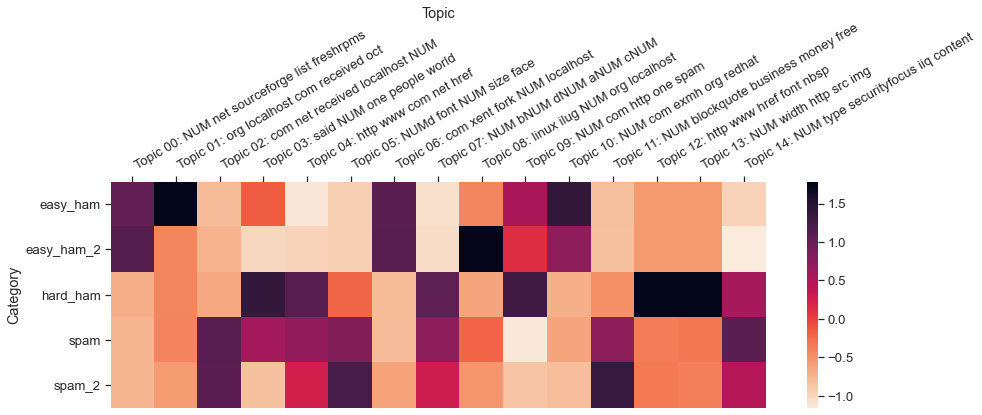

In [56]:
directory = combined_df['directory'].tolist()

target_labels = ["easy_ham", "easy_ham_2", "hard_ham", "spam", "spam_2"]

lmw.plot_categories_by_topics_heatmap(directory,
                                      topic_distributions,
                                      topic_keys, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(14,6))

In [81]:
print('Spam directory is related to the following topics : \n', pd.DataFrame([','.join(i) for i in topic_keys]).iloc[2,0],'\t', pd.DataFrame([','.join(i) for i in topic_keys]).iloc[14,0],'\t')
print('\n','Spam_2 directory is related to the following topics : \n', pd.DataFrame([','.join(i) for i in topic_keys]).iloc[2,0],'\n',pd.DataFrame([','.join(i) for i in topic_keys]).iloc[5,0],'\n',pd.DataFrame([','.join(i) for i in topic_keys]).iloc[11,0])

Spam directory is related to the following topics : 
 com,net,received,localhost,NUM,jul,org,netnoteinc,esmtp,content,http,zzzz,aug,mail,mon,subject,smtp,sep,date,message 	 NUM,type,securityfocus,iiq,content,insuranceiq,secprog,org,insurance,nextpart,input,name,message,sep,right,insurancemail,life,mailing,text,com 	

 Spam_2 directory is related to the following topics : 
 com,net,received,localhost,NUM,jul,org,netnoteinc,esmtp,content,http,zzzz,aug,mail,mon,subject,smtp,sep,date,message 
 NUMd,font,NUM,size,face,color,NUMdNUM,nbsp,width,align,arial,center,table,verdana,helvetica,serif,height,sans,div,border 
 NUM,blockquote,business,money,free,com,people,email,get,one,mail,make,report,send,order,time,internet,address,received,information


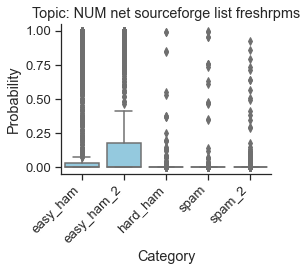

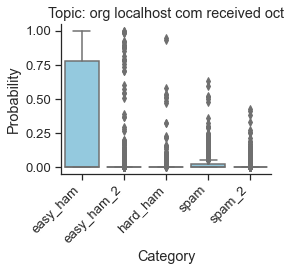

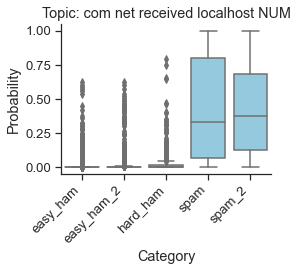

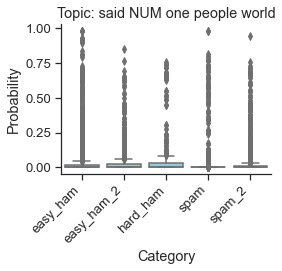

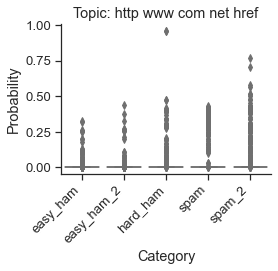

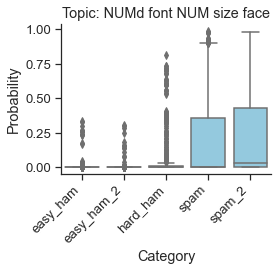

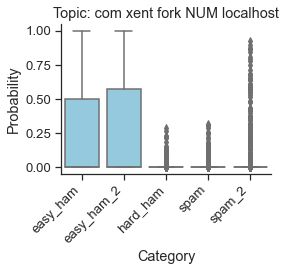

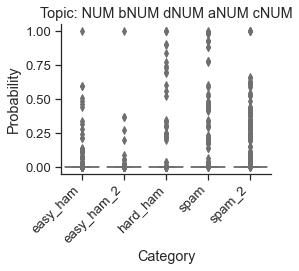

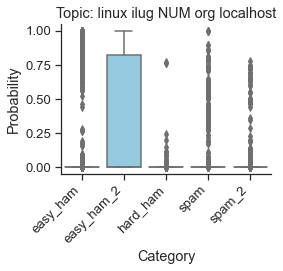

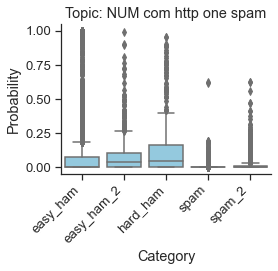

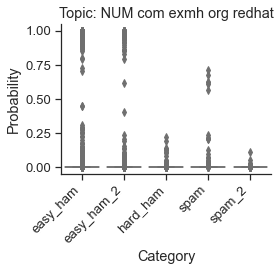

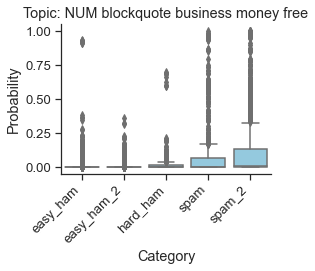

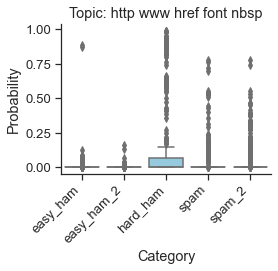

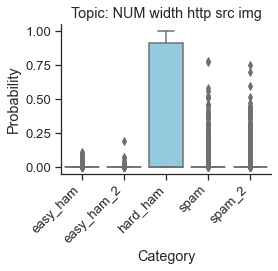

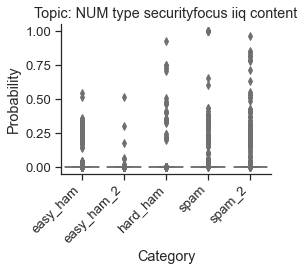

In [82]:
target_labels = ["easy_ham", "easy_ham_2", "hard_ham", "spam", "spam_2"]

for _topic_index in range(0, len(topic_keys)):
    
    lmw.plot_categories_by_topic_boxplots(directory,
                                          topic_distributions,
                                          topic_keys, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

### PCA plot using Gensim package

From Mallet's LDA model, it is observed that topic 2,5,11 and 14 make up the the emails in the spam directories. 
From the Gensim's interactive PCA plot below, it appears that words that make up clusters of topic 1,5,7 and 9 are very similar to the topic 2,5,11 and 14 of Mallet's model. Thus we can conclude that those clusters make up the spam directories. 
Below are some of the observed characteristics of topics from the spam directory. 

- Topic 1 from the PCA plot below mainly talk about font sizes, styles of the email using words such as "font","width","color","verdana". 
- Topic 5 talks about sending money to a certain address using words such as "send", "free", "money", "address", "investment", "services"
- The overall term frequencies of the words in Topic 1 and 5 are very low, meaning they are very specific to each individual topic. This tells that these words are very unique in spam directories and can be used as features for modeling. 
- Looking at the shape of the PCA plot, the number of clusters could be reduced down to 3 for further research. 

In [83]:
import gensim
from gensim.corpora import Dictionary
import pickle
import pandas as pd
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
from pprint import pprint
import spacy
import re 
import pyLDAvis
import matplotlib.pyplot as plt 
import pandas as pd
import gensim.corpora as corpora

# Create Dictionary
dictionary = corpora.Dictionary(combined_df['text'])

# Create Corpus
texts = combined_df['text']

# Term Document Frequency
doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

lda_model.print_topics()

[(0,
  '0.096*"http" + 0.013*"web" + 0.010*"software" + 0.010*"site" + 0.007*"windows" + 0.006*"url" + 0.006*"internet" + 0.005*"news" + 0.005*"file" + 0.004*"..."'),
 (1,
  '0.011*"business" + 0.009*"blockquote" + 0.009*"/blockquote" + 0.007*"company" + 0.007*"government" + 0.007*"money" + 0.005*"security" + 0.005*"information" + 0.005*"grants" + 0.005*"new"'),
 (2,
  '0.036*"com" + 0.026*"exmh" + 0.024*"received" + 0.020*"org" + 0.020*"redhat" + 0.020*"localhost" + 0.018*"listman" + 0.017*"mx1" + 0.014*"taint" + 0.014*"spamassassin"'),
 (3,
  '0.057*"font" + 0.053*"/font" + 0.049*"http" + 0.044*"/td" + 0.031*"nbsp" + 0.026*"img" + 0.024*"/tr" + 0.024*"width=" + 0.020*"arial" + 0.020*"href="'),
 (4,
  '0.028*"net" + 0.027*"linux" + 0.027*"localhost" + 0.024*"received" + 0.023*"ilug" + 0.022*"org" + 0.017*"esmtp" + 0.016*"lugh" + 0.015*"aug" + 0.014*"rpm"'),
 (5,
  '0.030*"zoo" + 0.030*"petting" + 0.028*"net" + 0.017*"0xdeadbeef" + 0.013*"cache" + 0.009*"bulletin" + 0.008*"gentle" + 0.

In [84]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.054327 -0.266001       1        1  22.999359
13     0.236237  0.108736       2        1  12.349814
6      0.216072 -0.006306       3        1  11.366935
4      0.221381  0.099358       4        1   9.967681
14     0.068512 -0.237734       5        1   8.867432
12     0.198047  0.122532       6        1   7.409811
1     -0.019707 -0.267274       7        1   6.970847
10     0.191727  0.138039       8        1   6.955666
0     -0.004467 -0.200983       9        1   5.612169
2      0.148325  0.153306      10        1   4.340695
11    -0.228310  0.034375      11        1   1.162298
9     -0.278319  0.058295      12        1   0.751735
7     -0.239746  0.072394      13        1   0.516939
8     -0.288558  0.083844      14        1   0.445193
5     -0.275521  0.107420      15        1   0.283425, topic_info=              Term          Freq         Total Category  logprob  loglift
26            http  89586.000000  89586.000000  Default  30.0000  30.0000
3136          font  54670.000000  54670.000000  Default  29.0000  29.0000
13667        /font  50294.000000  50294.000000  Default  28.0000  28.0000
7              com  92429.000000  92429.000000  Default  27.0000  27.0000
275            net  45666.000000  45666.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
9745       chinese     24.211231    117.998437  Topic15  -6.1831   4.2821
242           list     53.294453  17434.919379  Topic15  -5.3941   0.0756
19321       bottle     25.579236    217.545614  Topic15  -6.1282   3.7254
542      subscribe     26.821543   1758.156159  Topic15  -6.0808   1.6832
771    unsubscribe     26.644350   2205.735568  Topic15  -6.0874   1.4497

[947 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
23902     15  0.922857        +ok
23911     15  0.922857     -sarun
565        1  0.028281        ...
565        2  0.157864        ...
565        3  0.092034        ...
...      ...       ...        ...
2212       3  0.707951       zzzz
2212       4  0.143854       zzzz
2212       6  0.105582       zzzz
2212      10  0.009680       zzzz
2582       3  0.998146  zzzzteana

[2294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 14, 7, 5, 15, 13, 2, 11, 1, 3, 12, 10, 8, 9, 6])